In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Distance entre X et Y (Le Maximum autorisé) : 4.0


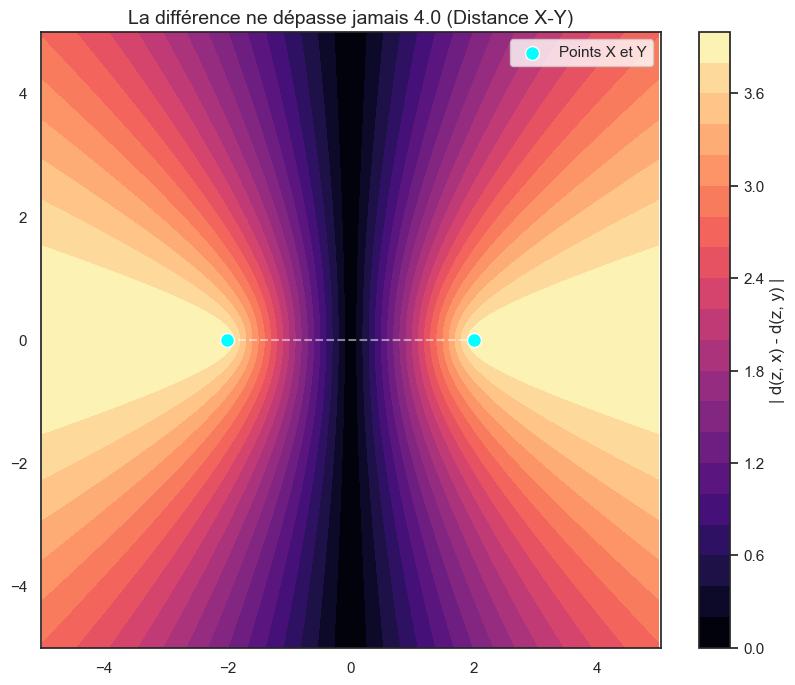

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. On place deux points fixes X et Y
point_x = np.array([-2, 0])
point_y = np.array([2, 0])

# La distance entre X et Y est de 4 (c'est notre "Vitesse limite")
dist_xy = np.linalg.norm(point_x - point_y)
print(f"Distance entre X et Y (Le Maximum autorisé) : {dist_xy}")

# 2. Création de la grille (l'espace Z)
x_range = np.linspace(-5, 5, 400)
y_range = np.linspace(-5, 5, 400)
X_grid, Y_grid = np.meshgrid(x_range, y_range)

# 3. Calcul des distances pour chaque point de la grille
# On recrée la structure (x, y) pour le calcul vectoriel
Z_grid = np.dstack((X_grid, Y_grid))

# Distance de chaque point Z vers X
dist_z_x = np.sqrt(np.sum((Z_grid - point_x)**2, axis=2))
# Distance de chaque point Z vers Y
dist_z_y = np.sqrt(np.sum((Z_grid - point_y)**2, axis=2))

# 4. Le cœur du problème : La différence absolue
# | d(z,x) - d(z,y) |
diff_absolute = np.abs(dist_z_x - dist_z_y)

# 5. Visualisation
plt.figure(figsize=(10, 8))
sns.set_theme(style="white")

# On trace la carte de chaleur
# vmin=0 et vmax=dist_xy pour montrer que ça ne sature pas au-dessus de 4
heatmap = plt.contourf(X_grid, Y_grid, diff_absolute, levels=20, cmap="magma")
plt.colorbar(heatmap, label="| d(z, x) - d(z, y) |")

# On dessine les points X et Y
plt.scatter([point_x[0], point_y[0]], [point_x[1], point_y[1]], c='cyan', s=100, edgecolors='white', label='Points X et Y', zorder=5)

# On dessine le segment entre X et Y
plt.plot([point_x[0], point_y[0]], [point_x[1], point_y[1]], 'w--', alpha=0.5)

plt.title(f"La différence ne dépasse jamais {dist_xy:.1f} (Distance X-Y)", fontsize=14)
plt.axis('equal') # Important pour ne pas déformer la géométrie
plt.legend()
plt.show()

C:\Users\Yassin Zouibi\AppData\Local\Temp\ipykernel_7980\1691739920.py:72: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Yassin Zouibi\PycharmProjects\archivefy-ml\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


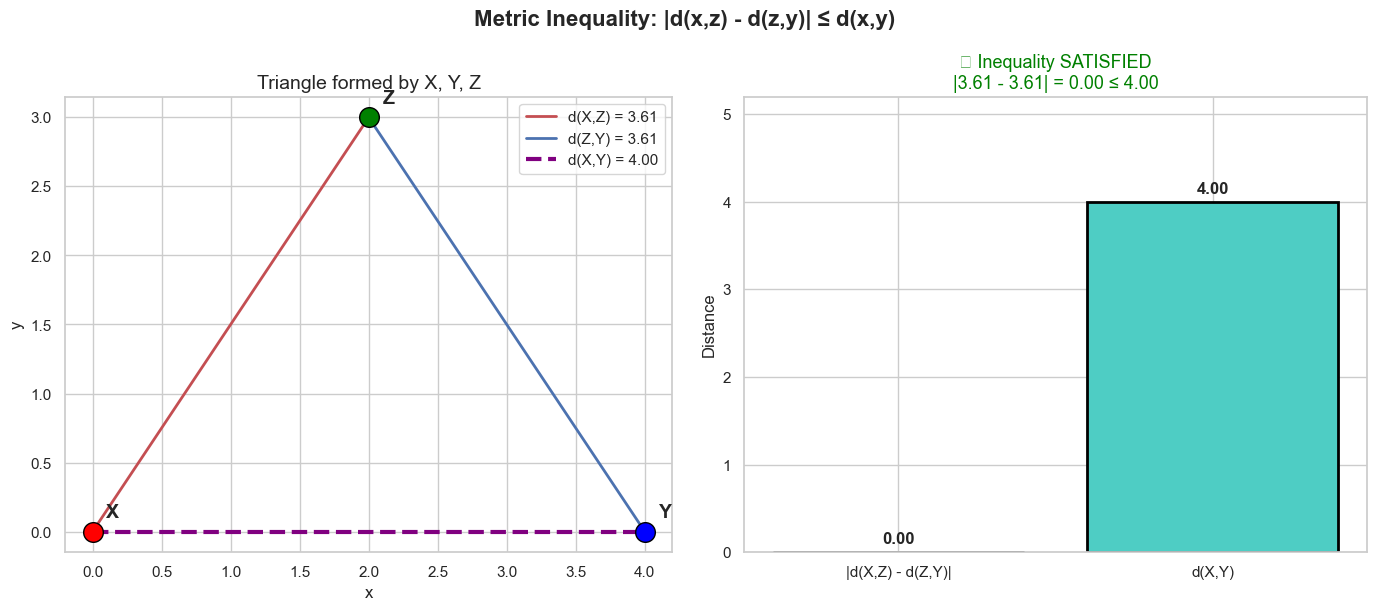

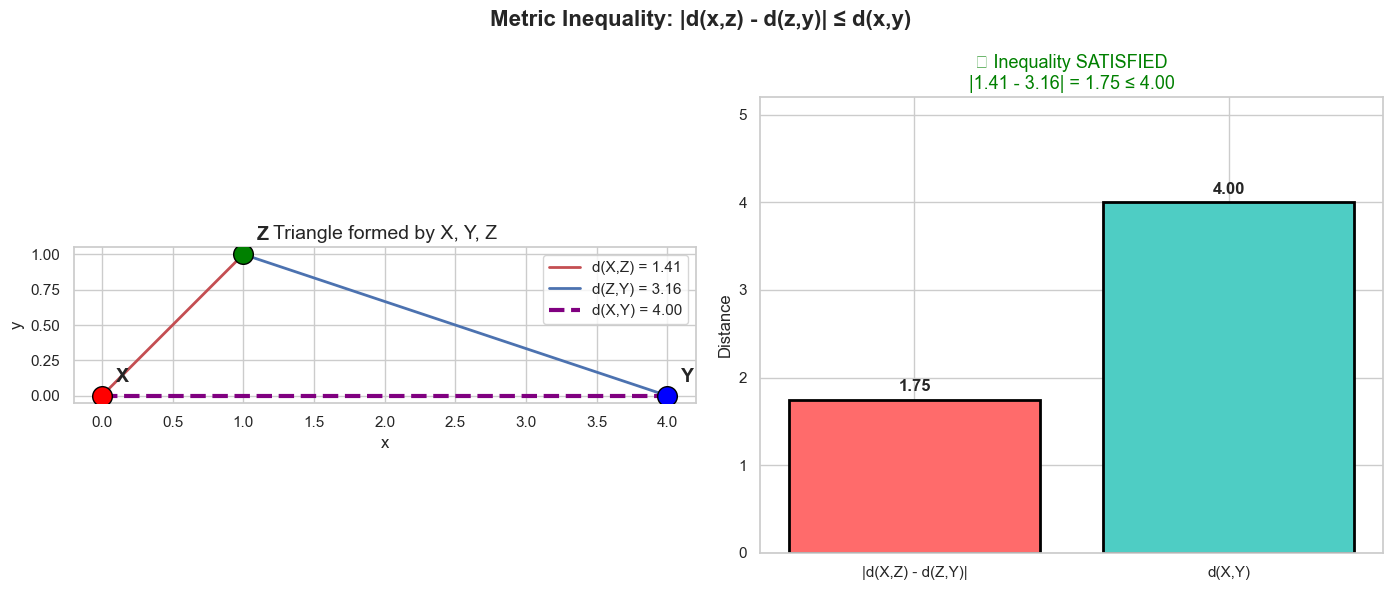

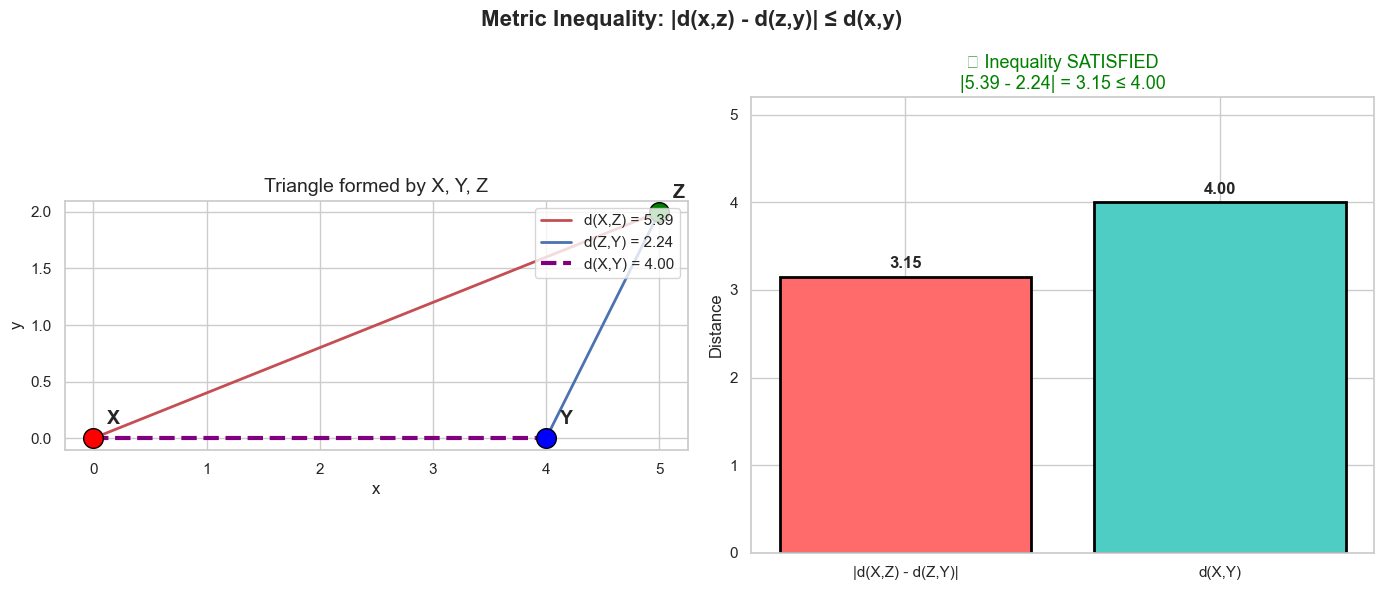

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metric_inequality(x, y, z):
    """
    Visualize the inequality |d(x,z) - d(z,y)| <= d(x,y)
    for any three points x, y, z.
    """
    # Calculate distances
    d_xz = np.linalg.norm(np.array(x) - np.array(z))
    d_zy = np.linalg.norm(np.array(z) - np.array(y))
    d_xy = np.linalg.norm(np.array(x) - np.array(y))

    # The inequality values
    left_side = abs(d_xz - d_zy)
    right_side = d_xy

    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.set_theme(style="whitegrid")

    # Left plot: Triangle with distances
    ax1 = axes[0]
    points = {'X': x, 'Y': y, 'Z': z}
    colors = {'X': 'red', 'Y': 'blue', 'Z': 'green'}

    # Draw triangle edges
    ax1.plot([x[0], z[0]], [x[1], z[1]], 'r-', lw=2, label=f'd(X,Z) = {d_xz:.2f}')
    ax1.plot([z[0], y[0]], [z[1], y[1]], 'b-', lw=2, label=f'd(Z,Y) = {d_zy:.2f}')
    ax1.plot([x[0], y[0]], [x[1], y[1]], 'purple', lw=3, linestyle='--', label=f'd(X,Y) = {d_xy:.2f}')

    # Plot points
    for name, pt in points.items():
        ax1.scatter(*pt, c=colors[name], s=200, zorder=5, edgecolors='black')
        ax1.annotate(name, pt, fontsize=14, fontweight='bold',
                     xytext=(10, 10), textcoords='offset points')

    ax1.set_title('Triangle formed by X, Y, Z', fontsize=14)
    ax1.legend(loc='upper right')
    ax1.set_aspect('equal')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    # Right plot: Bar comparison
    ax2 = axes[1]
    labels = ['|d(X,Z) - d(Z,Y)|', 'd(X,Y)']
    values = [left_side, right_side]
    colors_bar = ['#FF6B6B', '#4ECDC4']

    bars = ax2.bar(labels, values, color=colors_bar, edgecolor='black', linewidth=2)

    # Add value labels on bars
    for bar, val in zip(bars, values):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                 f'{val:.2f}', ha='center', fontsize=12, fontweight='bold')

    # Show inequality result
    if left_side <= right_side:
        result = "✓ Inequality SATISFIED"
        color = 'green'
    else:
        result = "✗ Inequality VIOLATED"
        color = 'red'

    ax2.set_title(f'{result}\n|{d_xz:.2f} - {d_zy:.2f}| = {left_side:.2f} ≤ {d_xy:.2f}',
                  fontsize=13, color=color)
    ax2.set_ylabel('Distance')
    ax2.set_ylim(0, max(values) * 1.3)

    plt.suptitle('Metric Inequality: |d(x,z) - d(z,y)| ≤ d(x,y)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Example usage with dynamic parameters
x = (0, 0)
y = (4, 0)
z = (2, 3)

plot_metric_inequality(x, y, z)

# Try with different z positions
plot_metric_inequality(x, y, (1, 1))
plot_metric_inequality(x, y, (5, 2))